import library

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import os
import json
import pandas as pd


In [2]:

#
def getData(limit = 1000,dataLimit = 60):
    #all node to return
    all_edges = []
    #reading directory dataSet
    allFiles =  os.listdir("my dataset")
    
    # get targe to relative people who follow him
    targetIndexFollowers = allFiles.index("_hassan.sheikh7-followers.json")
    targetIndexFollowing =allFiles.index("_hassan.sheikh7-following.json")
    
    #swap with source target follower and followings to first
    
    allFiles[0],allFiles[targetIndexFollowers] = allFiles[targetIndexFollowers],allFiles[0]
    allFiles[1],allFiles[targetIndexFollowing] = allFiles[targetIndexFollowing],allFiles[1]
    index = 0
    for file in allFiles :
        
        #if index % 2 ==0 :
            #index+=1 
            #continue
        
        index+=1
        #get file
        jsonData = open(f"my dataset/{file}") 
        allData = json.load(jsonData)
        dataIndex = 0
        for data in allData :
            if dataIndex > dataLimit :
                break;
            #reading data
            fromUserID = data['fromUserID'] 
            toUSerId = data['toUserID']
            #add edge
            all_edges.append((fromUserID,toUSerId))
            dataIndex +=1
 
        if len(all_edges) > limit :
            break
 
    return  all_edges   
   

In [3]:
data = getData(2000,100)
print(len(data))

2051


In [4]:
G = nx.Graph()


G.add_edges_from(data)

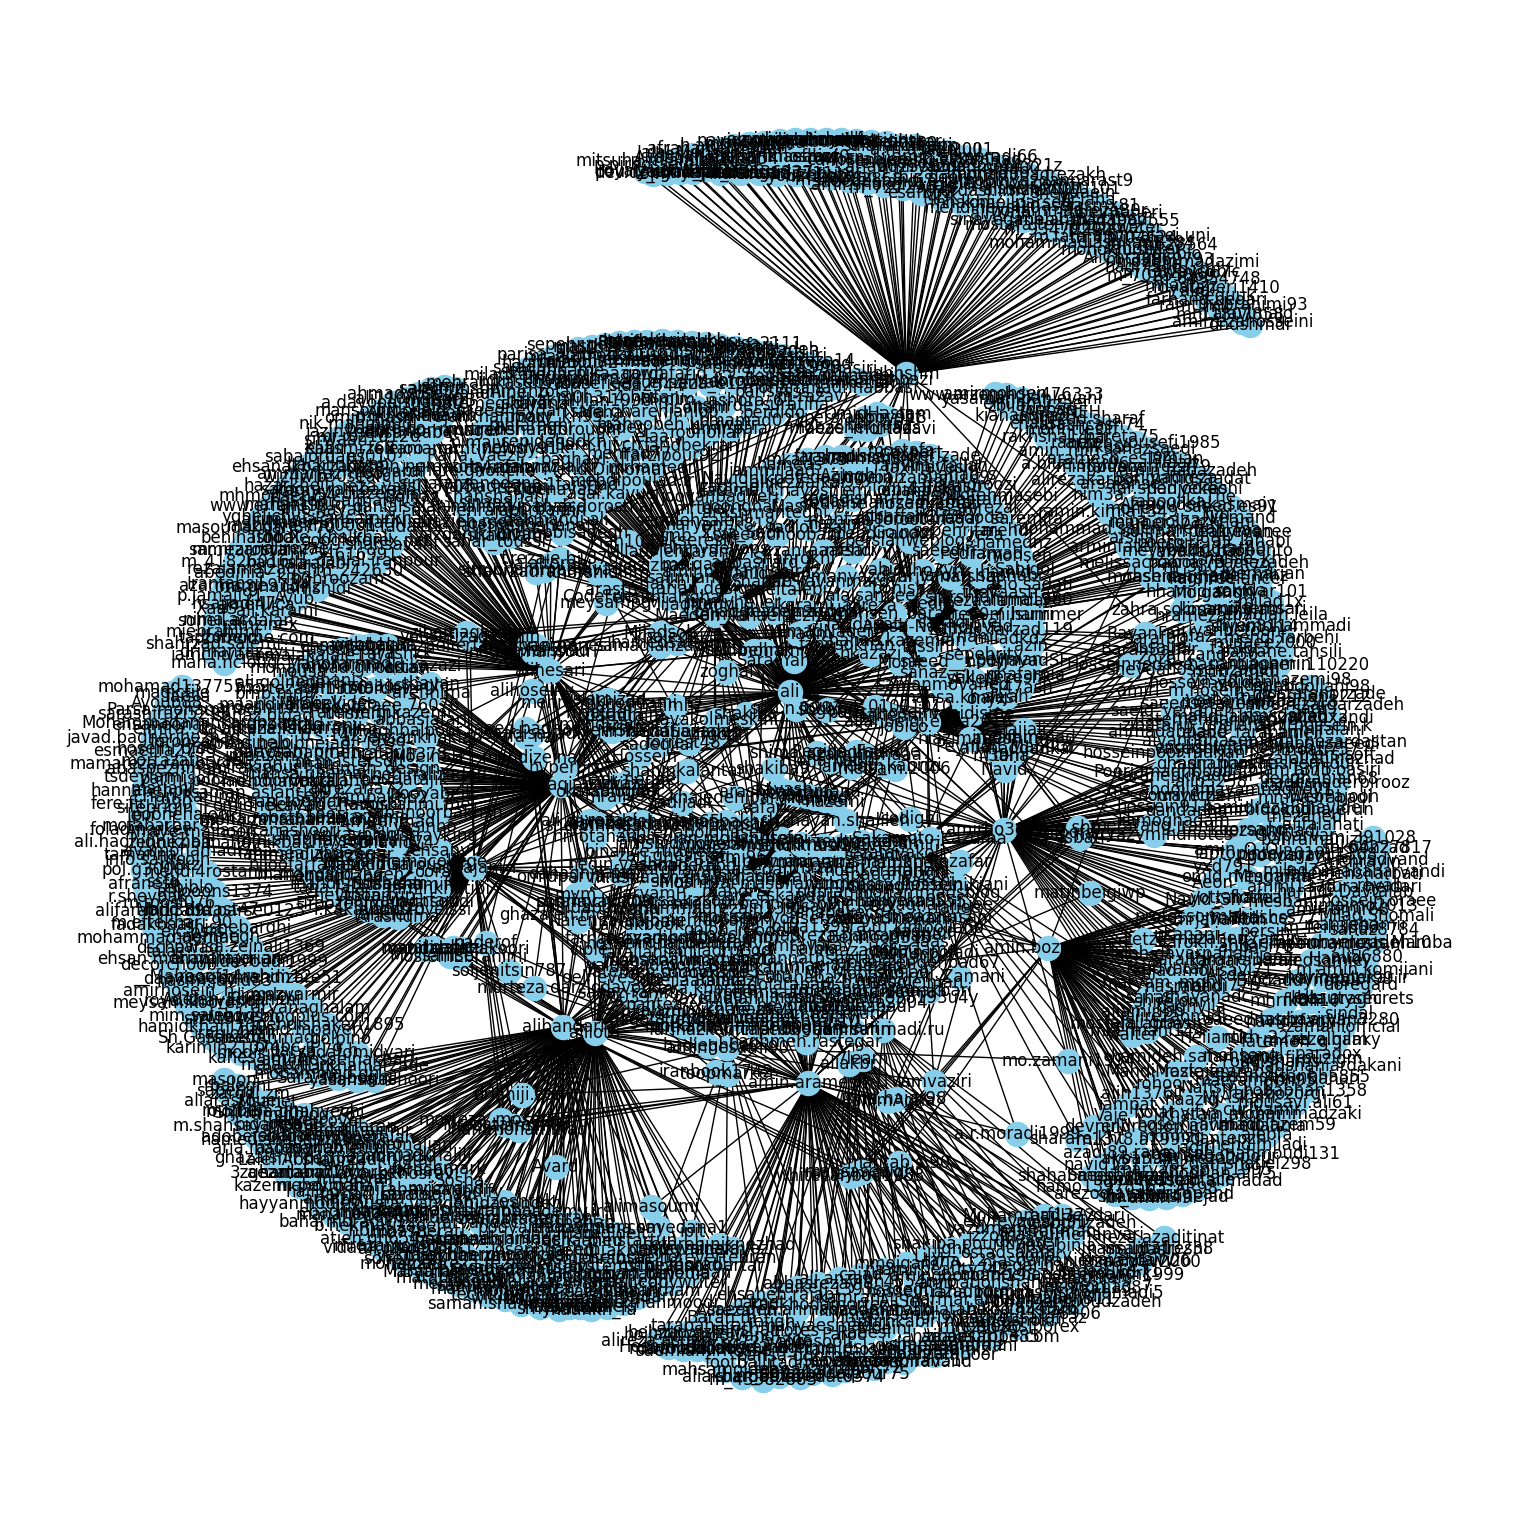

In [5]:
#plt.figure(figsize=(15,15))
#pos = nx.kamada_kawai_layout(G)
#nx.draw(G,with_labels = True,node_color = 'skyblue',pos=pos)
#plt.show()

In [6]:


#get degree of all node
graph_Dict = dict(G.degree)
#set Size of node according to degree
nx.set_node_attributes(G,graph_Dict,"value")
#create pyvis network
net = Network(width='100%',height='720px',bgcolor="#222222", font_color="white",directed=False,select_menu=True,filter_menu=True)
net.from_nx(G)


options = {
    "configure": {
         "enabled": True
     },
    "interaction": {
        "hover": True
    },

    "nodes": {
         "borderWidth": 2,
         "borderWidthSelected": 4,
         "chosen" : True,
         "color": { "highlight": { "border": "#FF4040",
                                   "background": "#EE3B3B"
                     },
                    "hover": { "border": "#DEB887",
                               "background": "#FFD39B"
                     }
         }
     }
}
#show option
net.show_buttons(filter_=['physics'])
net.options  = options
#save  the graph
net.save_graph("virgool.html")
#net.show("virgool.html")

In [7]:

#show degree_centrality
degree_centrality = nx.degree_centrality(G)

degree_centrality

{'FariN': 0.0006544502617801048,
 'hassan.sheikh7': 0.13023560209424084,
 'shakiba9': 0.0045811518324607335,
 'worldmohammad': 0.003926701570680629,
 'shahinkalantary': 0.003926701570680629,
 'capcut': 0.0006544502617801048,
 'shetannathshetanath900': 0.0006544502617801048,
 'abbaszendehbad67': 0.0006544502617801048,
 'pantea': 0.0013089005235602095,
 'hadi_nedaei': 0.0013089005235602095,
 'soltani': 0.0006544502617801048,
 'sepidy.67': 0.0006544502617801048,
 'mcompanya': 0.0006544502617801048,
 're_za': 0.0006544502617801048,
 'zahra.heydari1131': 0.0006544502617801048,
 'e.dolatabadi': 0.0006544502617801048,
 'm.azad65': 0.0006544502617801048,
 'ghazalehm': 0.0006544502617801048,
 'allahbeigi.elina2016': 0.05890052356020943,
 'farhikhteh10': 0.0006544502617801048,
 'javidjava2004': 0.0006544502617801048,
 'SogolSheydaei': 0.0013089005235602095,
 'amn.hseini': 0.0006544502617801048,
 'afshirazi': 0.0006544502617801048,
 'javad.mjn': 0.0006544502617801048,
 'meisam.2006': 0.0013089005

<Axes: >

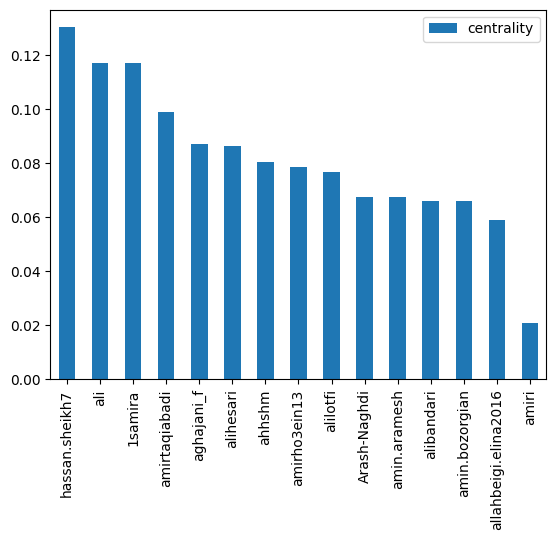

In [8]:
degree_df = pd.DataFrame.from_dict(degree_centrality,orient='index',columns=['centrality'])

degree_df.sort_values('centrality',ascending=False,)[0:15].plot(kind='bar')

In [9]:
#show betweenness_centrality

betweenness_centrality = nx.betweenness_centrality(G)

betweenness_centrality

{'FariN': 0.0,
 'hassan.sheikh7': 0.3687936585782617,
 'shakiba9': 0.014653538021226676,
 'worldmohammad': 0.02009694693534771,
 'shahinkalantary': 0.00944319677635134,
 'capcut': 0.0,
 'shetannathshetanath900': 0.0,
 'abbaszendehbad67': 0.0,
 'pantea': 0.0,
 'hadi_nedaei': 0.0,
 'soltani': 0.0,
 'sepidy.67': 0.0,
 'mcompanya': 0.0,
 're_za': 0.0,
 'zahra.heydari1131': 0.0,
 'e.dolatabadi': 0.0,
 'm.azad65': 0.0,
 'ghazalehm': 0.0,
 'allahbeigi.elina2016': 0.083592891516566,
 'farhikhteh10': 0.0,
 'javidjava2004': 0.0,
 'SogolSheydaei': 0.0,
 'amn.hseini': 0.0,
 'afshirazi': 0.0,
 'javad.mjn': 0.0,
 'meisam.2006': 0.0,
 'wildroseir': 0.0,
 'hesamkaveh': 0.0,
 'Mobin.poladi': 0.0,
 'hasangilak': 0.0,
 'tavakolmeskini': 0.001987733429234163,
 'ehsan.hajikhanii': 0.0,
 'meemsaad': 0.0,
 'kaveh': 0.0,
 'b.mirisoleiman': 0.0,
 'Sakamoto-Kazuma': 0.0,
 'mmahboobb': 0.0,
 'm.asnaashari93': 0.0,
 'dahakajjwk': 0.0,
 'mohammadekhosravi': 0.0,
 'meysam.tlv': 0.0,
 'ehsankamali': 0.0,
 'shojaei.x

<Axes: >

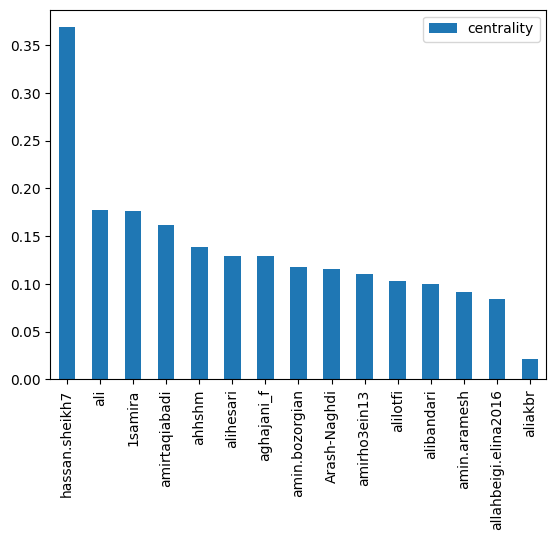

In [10]:
betweenness_df = pd.DataFrame.from_dict(betweenness_centrality,orient='index',columns=['betweenness centrality'])
betweenness_df.sort_values('centrality',ascending=False,)[0:15].plot(kind='bar')

In [11]:
closeness_centrality = nx.closeness_centrality(G)

closeness_centrality

{'FariN': 0.340160284951024,
 'hassan.sheikh7': 0.5153456998313659,
 'shakiba9': 0.41086313525141166,
 'worldmohammad': 0.4053050397877984,
 'shahinkalantary': 0.3903934593765968,
 'capcut': 0.340160284951024,
 'shetannathshetanath900': 0.340160284951024,
 'abbaszendehbad67': 0.340160284951024,
 'pantea': 0.3480637813211845,
 'hadi_nedaei': 0.3494967978042086,
 'soltani': 0.340160284951024,
 'sepidy.67': 0.340160284951024,
 'mcompanya': 0.340160284951024,
 're_za': 0.340160284951024,
 'zahra.heydari1131': 0.340160284951024,
 'e.dolatabadi': 0.340160284951024,
 'm.azad65': 0.340160284951024,
 'ghazalehm': 0.340160284951024,
 'allahbeigi.elina2016': 0.3980203177910914,
 'farhikhteh10': 0.340160284951024,
 'javidjava2004': 0.340160284951024,
 'SogolSheydaei': 0.3480637813211845,
 'amn.hseini': 0.340160284951024,
 'afshirazi': 0.340160284951024,
 'javad.mjn': 0.340160284951024,
 'meisam.2006': 0.3559282552993245,
 'wildroseir': 0.340160284951024,
 'hesamkaveh': 0.340160284951024,
 'Mobin.p

<Axes: >

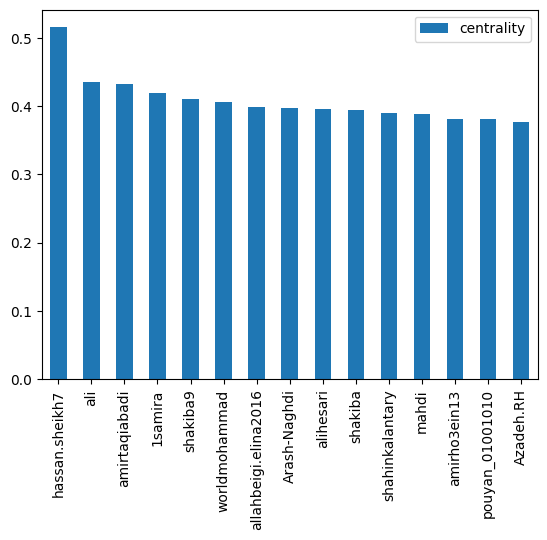

In [12]:
closeness_df = pd.DataFrame.from_dict(closeness_centrality,orient='index',columns=['centrality'])
closeness_df.sort_values('centrality',ascending=False,)[0:15].plot(kind='bar')

In [13]:

#set up community  of node ech belong to

authorCommunity = nx.community.louvain_communities(G, seed=123)
dictAuthor = {}
groupe = 0
for authors in authorCommunity :
   
    
    for author in authors :
        dictAuthor[author]  = groupe    
    groupe+=1
    

print(dict(dictAuthor))     

communities = dict(dictAuthor)   

{'man73': 0, 'dahakajjwk': 0, 'javidjava2004': 0, 'parnian.mollahoseini': 0, 'mohammadsblog': 0, 'mcompanya': 0, 're_za': 0, 'ahmadreza.bahramian': 0, 'withmussy': 0, 'mohsenm': 0, 'masoudkaviani': 0, 'Faezeh': 0, 'fazelnajafi': 0, 'mrtaheri': 0, 'mohsenmosafi': 0, 'hamkheir': 0, 'sugooksite': 0, 'sami96': 0, 'anahid': 0, 'mohsenahmadvand': 0, 'jamshidmohebbi': 0, 'shojaei.x': 0, 'sepidy.67': 0, 'masihjahangiri': 0, 'mikhanam': 0, 'yooSefIsHere98193u4y': 0, 'rainyman555': 0, 'rezatavakoli': 0, 'halbia': 0, 'muhammadrezain1395': 0, 'guman': 0, 'ipakchi': 0, 'meemsaad': 0, 'parsa-kakooi': 0, 'Alborz': 0, 'pts.pw.mail': 0, 'shetannathshetanath900': 0, 'God': 0, 'lotfia1395': 0, 'farajianim': 0, 'ehsankamali': 0, '_sra.m': 0, 'hanet.ir': 0, 'khatoonabadi': 0, 'maryamshahriari': 0, 'Pouyasheikhhasani': 0, 'Mr_Mobham': 0, 'zohrehabolghasem': 0, 'meysam.tlv': 0, 'miladrp': 0, 'MICROB': 0, 'farhadarkani': 0, 'hesamkaveh': 0, 'ihmahmoodi': 0, 'royaghamiluee': 0, '1shabakeco': 0, 'parastoo': 0, 

In [14]:
#set it for attributes , so pyvis assigned deferent to color for each group
nx.set_node_attributes(G,communities,'group')

In [15]:

#create network for visualizing community

net = Network(width='100%',height='720px',bgcolor="#222222", font_color="white",directed=True,select_menu=True,filter_menu=True)
net.from_nx(G)


options = {
    "configure": {
         "enabled": True
     },
    "interaction": {
        "hover": True
    },

    "nodes": {
         "borderWidth": 2,
         "borderWidthSelected": 4,
         "chosen" : True,
         "color": { "highlight": { "border": "#FF4040",
                                   "background": "#EE3B3B"
                     },
                    "hover": { "border": "#DEB887",
                               "background": "#FFD39B"
                     }
         }
     }
}
net.show_buttons(filter_=['physics'])
net.options  = options
net.save_graph("virgool_Community.html")

In [16]:
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))

0.07590221858870744
3.470159807422981


In [30]:

#create prediction for friend suggestion with probity > 50%
#use resource_allocation_index for better time complexity

edgePredict = []
resultPredicts = nx.resource_allocation_index(G)
for resultPredict in resultPredicts:
    if resultPredict[2] > 0.5:
        edgePredict.append((resultPredict[0], resultPredict[1],10))

In [34]:

G_predict = nx.Graph()


#draw red line foreach prediction
for edge in edgePredict :
    G_predict.add_node(edge[0],color = "red")
    G_predict.add_node(edge[1],color = "red")

#save graph
G_predict.add_edges_from(data)
G_predict.add_weighted_edges_from(edgePredict)
netPredict = Network(width='100%',height='720px',bgcolor="#222222", font_color="white",directed=False,select_menu=True,filter_menu=True)
netPredict.from_nx(G_predict)


options = {
    "configure": {
         "enabled": True
     },
    "interaction": {
        "hover": True
    },

    "nodes": {
         "borderWidth": 2,
         "borderWidthSelected": 4,
         "chosen" : True,
         "color": { "highlight": { "border": "#FF4040",
                                   "background": "#EE3B3B"
                     },
                    "hover": { "border": "#DEB887",
                               "background": "#FFD39B"
                     }
         }
     }
}
netPredict.show_buttons(filter_=['physics'])
netPredict.options  = options
netPredict.save_graph("virgool_predict.html")